In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.datasets import cifar10
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Reduce dataset size to avoid RAM issues

In [ ]:
num_samples = 5000
x_train, y_train = x_train[:num_samples], y_train[:num_samples]
x_test, y_test = x_test[:num_samples], y_test[:num_samples]

Processes Images


In [ ]:
x_train = preprocess_input(x_train.astype('float32'))
x_test = preprocess_input(x_test.astype('float32'))

load resnet (without top classification layer)

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

Extract features

In [ ]:
train_features = resnet_model.predict(x_train, batch_size=32)
test_features = resnet_model.predict(x_test, batch_size=32)

157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step


Train logistic regression classifier

In [ ]:
clf = LogisticRegression(max_iter=500)
clf.fit(train_features, y_train.ravel())

LogisticRegression(max_iter=500)

Evaluate model

In [ ]:
y_pred = clf.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5748


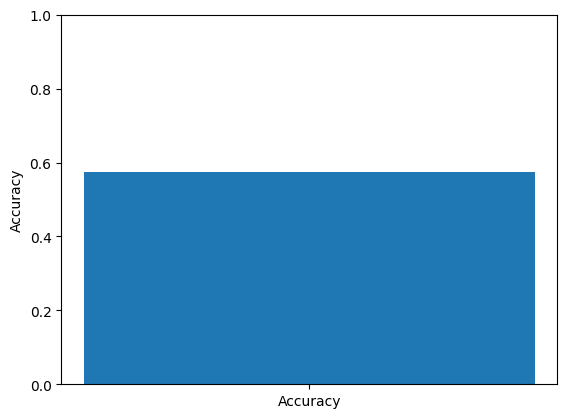

In [ ]:
import matplotlib.pyplot as plt
accuracy =  accuracy_score(y_test, y_pred)
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()